In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from fcmeans import FCM 
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances



In [5]:

# Đường dẫn tới thư mục BCVI
bcvi_folder = r"D:\HocTap2425\Seminar\Dataset\BCVI"

# Duyệt qua các thư mục (Case1, Case2, ...)
for case_folder in sorted(os.listdir(bcvi_folder)):
    case_path = os.path.join(bcvi_folder, case_folder)
    
    if os.path.isdir(case_path):  # Kiểm tra nếu là thư mục
        # Tạo danh sách lưu file cho từng Case
        case_data = []
        
        # Duyệt qua các thư mục con hoặc file trong từng Case
        for sub_folder_or_file in sorted(os.listdir(case_path)):
            sub_path = os.path.join(case_path, sub_folder_or_file)
            
            if os.path.isfile(sub_path):  # Nếu là file
                if sub_folder_or_file.endswith(".csv"):  # Đọc file CSV
                    df = pd.read_csv(sub_path)
                    case_data.append((sub_folder_or_file, df))
                elif sub_folder_or_file.endswith(".arff"):  # Đọc file ARFF
                    from scipy.io import arff
                    data, meta = arff.loadarff(sub_path)
                    df = pd.DataFrame(data)
                    case_data.append((sub_folder_or_file, df))
            elif os.path.isdir(sub_path):  # Nếu là thư mục con
                for file_name in sorted(os.listdir(sub_path)):
                    file_path = os.path.join(sub_path, file_name)
                    
                    if file_name.endswith(".csv"):  # Đọc file CSV
                        df = pd.read_csv(file_path)
                        case_data.append((file_name, df))
                    elif file_name.endswith(".arff"):  # Đọc file ARFF
                        from scipy.io import arff
                        data, meta = arff.loadarff(file_path)
                        df = pd.DataFrame(data)
                        case_data.append((file_name, df))
        
        # Tạo biến động cho từng Case (vd: case_data_Case1)
        globals()[f"case_data_{case_folder}"] = case_data

# Kiểm tra kết quả
print("Danh sách các biến chứa dữ liệu từng Case:")
for variable in sorted(globals()):
    if variable.startswith("case_data_"):
        print(f"{variable}: {len(globals()[variable])} file")


Danh sách các biến chứa dữ liệu từng Case:
case_data_AI_Datasets: 25 file
case_data_Case1: 5 file
case_data_Case2: 5 file
case_data_Case3: 5 file
case_data_Case4: 5 file
case_data_Case5: 5 file


# Dữ liệu được vẽ với label có sẵn

## Case 1:Tách biệt rõ về số cụm.

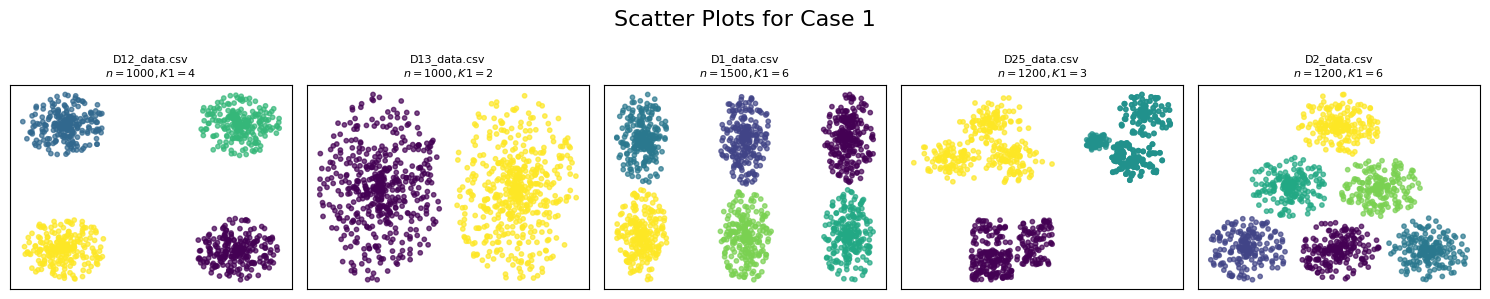

In [4]:
case_name = "Case 1"
case_files = case_data_Case1

num_files = len(case_files)

# Tạo figure với số hàng tương ứng số file
fig, axes = plt.subplots(1, num_files, figsize=(15, 3))  # 1 hàng, nhiều cột
axes = axes.flatten()  # Chuyển thành mảng 1D

# Duyệt từng file trong Case 1 để vẽ biểu đồ
for idx, (file_name, df) in enumerate(case_files):
    ax = axes[idx]
    
    # Kiểm tra cột label và cột số
    if 'label' not in df.columns or len(df.select_dtypes(include=['number']).columns) < 2:
        ax.axis('off')  # Bỏ khung nếu thiếu dữ liệu
        continue
    
    # Chọn cột x, y và label
    x_col, y_col = df.select_dtypes(include=['number']).columns[:2]
    labels = df['label']
    
    # Số lượng điểm dữ liệu và số lượng cụm
    num_data_points = len(df)
    num_clusters = len(labels.unique())
    
    # Vẽ scatter plot
    scatter = ax.scatter(df[x_col], df[y_col], c=labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_xticks([])  # Ẩn trục x
    ax.set_yticks([])  # Ẩn trục y
    
    # Hiển thị tên file, số lượng cụm và số lượng điểm dữ liệu với tiêu đề phụ
    ax.set_title(f"{file_name}\n$n = {num_data_points}, K1 = {num_clusters}$", fontsize=8)

    # Thêm legend nếu cần
    #ax.legend(*scatter.legend_elements(), title="Labels", loc='best', fontsize=8)

# Tạo một title chung cho toàn bộ figure
fig.suptitle(f"Scatter Plots for {case_name}", fontsize=16)

# Hiển thị
plt.tight_layout()
plt.show()


## Case 2: Các cụm này không chồng lấn và có thể phân biệt rõ.

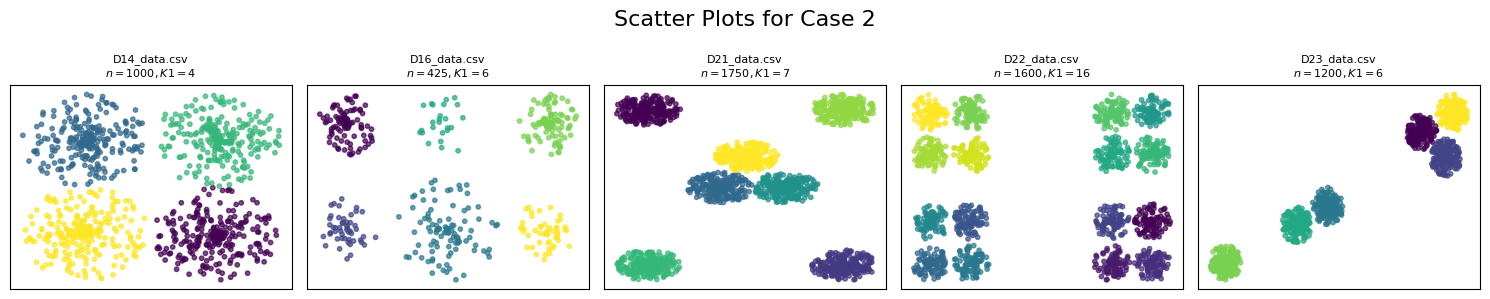

In [4]:
case_name = "Case 2"
case_files = case_data_Case2

num_files = len(case_files)

# Tạo figure với số hàng tương ứng số file
fig, axes = plt.subplots(1, num_files, figsize=(15, 3))  # 1 hàng, nhiều cột
axes = axes.flatten()  # Chuyển thành mảng 1D

# Duyệt từng file trong Case 1 để vẽ biểu đồ
for idx, (file_name, df) in enumerate(case_files):
    ax = axes[idx]
    
    # Kiểm tra cột label và cột số
    if 'label' not in df.columns or len(df.select_dtypes(include=['number']).columns) < 2:
        ax.axis('off')  # Bỏ khung nếu thiếu dữ liệu
        continue
    
    # Chọn cột x, y và label
    x_col, y_col = df.select_dtypes(include=['number']).columns[:2]
    labels = df['label']
    
    # Số lượng điểm dữ liệu và số lượng cụm
    num_data_points = len(df)
    num_clusters = len(labels.unique())
    
    # Vẽ scatter plot
    scatter = ax.scatter(df[x_col], df[y_col], c=labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_xticks([])  # Ẩn trục x
    ax.set_yticks([])  # Ẩn trục y
    
    # Hiển thị tên file, số lượng cụm và số lượng điểm dữ liệu với tiêu đề phụ
    ax.set_title(f"{file_name}\n$n = {num_data_points}, K1 = {num_clusters}$", fontsize=8)

    # Thêm legend nếu cần
    #ax.legend(*scatter.legend_elements(), title="Labels", loc='best', fontsize=8)

# Tạo một title chung cho toàn bộ figure
fig.suptitle(f"Scatter Plots for {case_name}", fontsize=16)

# Hiển thị
plt.tight_layout()
plt.show()


## Case 3: Kích thước và mật độ giữa các cụm khác nhau không đồng đều

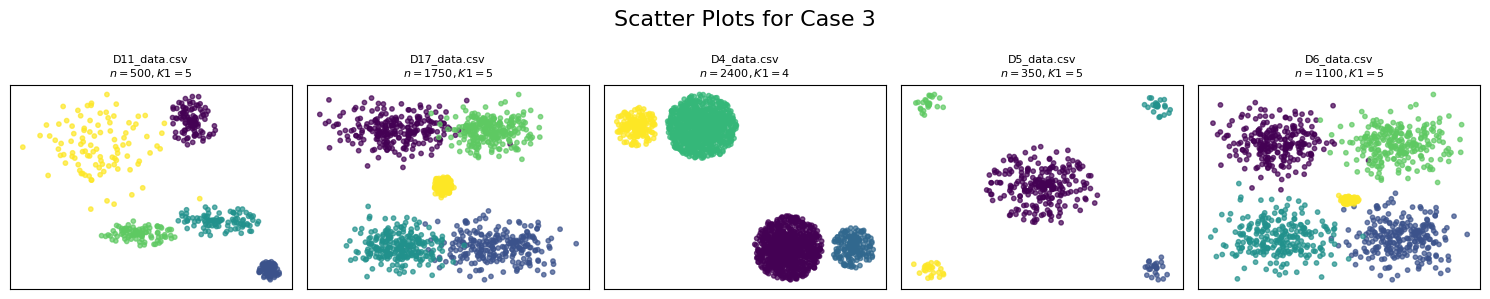

In [5]:
case_name = "Case 3"
case_files = case_data_Case3

num_files = len(case_files)

# Tạo figure với số hàng tương ứng số file
fig, axes = plt.subplots(1, num_files, figsize=(15, 3))  # 1 hàng, nhiều cột
axes = axes.flatten()  # Chuyển thành mảng 1D

# Duyệt từng file trong Case 1 để vẽ biểu đồ
for idx, (file_name, df) in enumerate(case_files):
    ax = axes[idx]
    
    # Kiểm tra cột label và cột số
    if 'label' not in df.columns or len(df.select_dtypes(include=['number']).columns) < 2:
        ax.axis('off')  # Bỏ khung nếu thiếu dữ liệu
        continue
    
    # Chọn cột x, y và label
    x_col, y_col = df.select_dtypes(include=['number']).columns[:2]
    labels = df['label']
    
    # Số lượng điểm dữ liệu và số lượng cụm
    num_data_points = len(df)
    num_clusters = len(labels.unique())
    
    # Vẽ scatter plot
    scatter = ax.scatter(df[x_col], df[y_col], c=labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_xticks([])  # Ẩn trục x
    ax.set_yticks([])  # Ẩn trục y
    
    # Hiển thị tên file, số lượng cụm và số lượng điểm dữ liệu với tiêu đề phụ
    ax.set_title(f"{file_name}\n$n = {num_data_points}, K1 = {num_clusters}$", fontsize=8)

    # Thêm legend nếu cần
    #ax.legend(*scatter.legend_elements(), title="Labels", loc='best', fontsize=8)

# Tạo một title chung cho toàn bộ figure
fig.suptitle(f"Scatter Plots for {case_name}", fontsize=16)

# Hiển thị
plt.tight_layout()
plt.show()


## Case 4: Các cụm có chồng lấn lên nhau

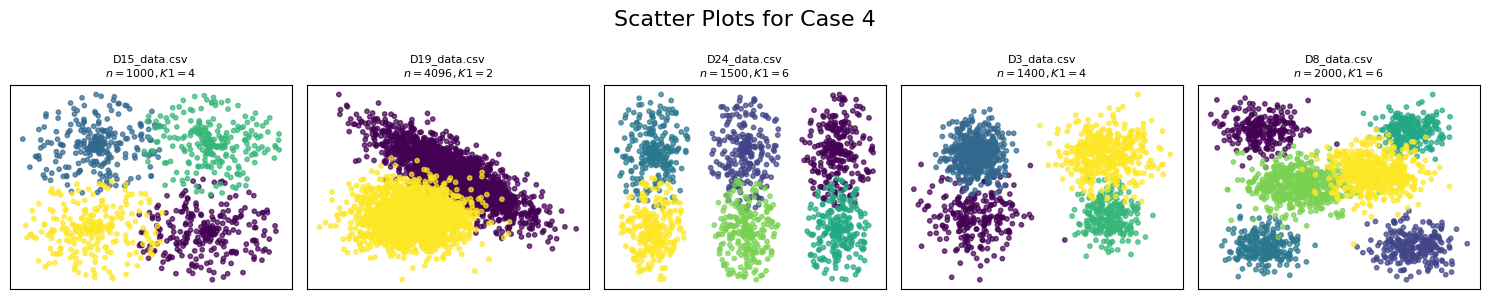

In [6]:
case_name = "Case 4"
case_files = case_data_Case4

num_files = len(case_files)

# Tạo figure với số hàng tương ứng số file
fig, axes = plt.subplots(1, num_files, figsize=(15, 3))  # 1 hàng, nhiều cột
axes = axes.flatten()  # Chuyển thành mảng 1D

# Duyệt từng file trong Case 1 để vẽ biểu đồ
for idx, (file_name, df) in enumerate(case_files):
    ax = axes[idx]
    
    # Kiểm tra cột label và cột số
    if 'label' not in df.columns or len(df.select_dtypes(include=['number']).columns) < 2:
        ax.axis('off')  # Bỏ khung nếu thiếu dữ liệu
        continue
    
    # Chọn cột x, y và label
    x_col, y_col = df.select_dtypes(include=['number']).columns[:2]
    labels = df['label']
    
    # Số lượng điểm dữ liệu và số lượng cụm
    num_data_points = len(df)
    num_clusters = len(labels.unique())
    
    # Vẽ scatter plot
    scatter = ax.scatter(df[x_col], df[y_col], c=labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_xticks([])  # Ẩn trục x
    ax.set_yticks([])  # Ẩn trục y
    
    # Hiển thị tên file, số lượng cụm và số lượng điểm dữ liệu với tiêu đề phụ
    ax.set_title(f"{file_name}\n$n = {num_data_points}, K1 = {num_clusters}$", fontsize=8)

    # Thêm legend nếu cần
    #ax.legend(*scatter.legend_elements(), title="Labels", loc='best', fontsize=8)

# Tạo một title chung cho toàn bộ figure
fig.suptitle(f"Scatter Plots for {case_name}", fontsize=16)

# Hiển thị
plt.tight_layout()
plt.show()


## Case 5: Hình dạng các cụm không cùng một khối

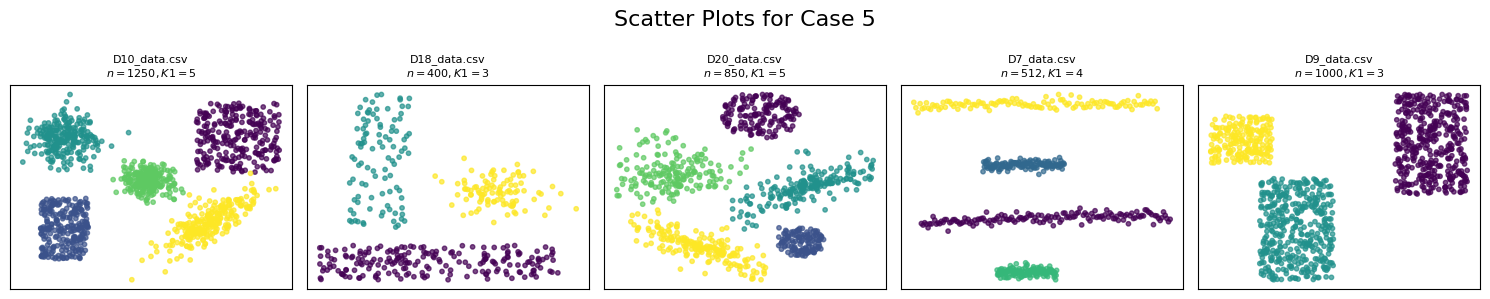

In [7]:
case_name = "Case 5"
case_files = case_data_Case5

num_files = len(case_files)

# Tạo figure với số hàng tương ứng số file
fig, axes = plt.subplots(1, num_files, figsize=(15, 3))  # 1 hàng, nhiều cột
axes = axes.flatten()  # Chuyển thành mảng 1D

# Duyệt từng file trong Case 1 để vẽ biểu đồ
for idx, (file_name, df) in enumerate(case_files):
    ax = axes[idx]
    
    # Kiểm tra cột label và cột số
    if 'label' not in df.columns or len(df.select_dtypes(include=['number']).columns) < 2:
        ax.axis('off')  # Bỏ khung nếu thiếu dữ liệu
        continue
    
    # Chọn cột x, y và label
    x_col, y_col = df.select_dtypes(include=['number']).columns[:2]
    labels = df['label']
    
    # Số lượng điểm dữ liệu và số lượng cụm
    num_data_points = len(df)
    num_clusters = len(labels.unique())
    
    # Vẽ scatter plot
    scatter = ax.scatter(df[x_col], df[y_col], c=labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_xticks([])  # Ẩn trục x
    ax.set_yticks([])  # Ẩn trục y
    
    # Hiển thị tên file, số lượng cụm và số lượng điểm dữ liệu với tiêu đề phụ
    ax.set_title(f"{file_name}\n$n = {num_data_points}, K1 = {num_clusters}$", fontsize=8)

    # Thêm legend nếu cần
    #ax.legend(*scatter.legend_elements(), title="Labels", loc='best', fontsize=8)

# Tạo một title chung cho toàn bộ figure
fig.suptitle(f"Scatter Plots for {case_name}", fontsize=16)

# Hiển thị
plt.tight_layout()
plt.show()


### Dữ liệu Artificial 

In [2]:
# Đường dẫn đến folder chứa các file CSV
folder_path = r"D:\HocTap2425\Seminar\Dataset\BCVI\AI_Datasets"

# Tạo một danh sách để lưu các DataFrame
dataframes = []

# Lặp qua tất cả các file trong folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Kiểm tra xem file có phải là CSV không
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)  # Đọc file CSV
        dataframes.append(df)  # Thêm vào danh sách các DataFrame

#dataframes

# K-Means 

## Case 1

In [25]:
case_data_Case1 = globals().get("case_data_Case1")


output_result = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case1"
os.makedirs(output_result, exist_ok=True)

cluster_choices = [4, 2, 6, 3, 6]

def K_means_Case1(case_data, cluster_choices):
    for i, (file_name, df) in enumerate(case_data):
        print(f"Dang xu ly file!!!: {file_name}")

        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])

        n_clusters = cluster_choices[i]

        #K Means
        Km = KMeans(n_clusters=n_clusters, random_state=42)
        df["Cluster"] = Km.fit_predict(scaled_data)

        #PCA cho dữ liệu giảm xuống 2 chiều để vẽ hình ảnh
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(scaled_data)
        df['PCA1'] = reduced_data[:, 0]
        df['PCA2'] = reduced_data[:, 1]

        #plot
        plt.figure(figsize=(8, 6))
        for cluster in range(n_clusters):
            cluster_data = df[df['Cluster'] == cluster]
            plt.scatter(
                cluster_data['PCA1'],
                cluster_data['PCA2'],
                label = f"Cluster{cluster}"
            )

        #Đánh dấu tâm cụm
        centroids_reduced = pca.transform(Km.cluster_centers_)
        plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s = 200, c = 'black', marker="x", label = "Centroids")

        plt.title(f"Phân cụm K-Means cho {file_name} (k={n_clusters})")
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")

        visualization_path = os.path.join(output_result, f"Cluster_{file_name}.png")
        plt.savefig(visualization_path)
        plt.close()
        
        print(f"Đã lưu hình ảnh phân cụm vào: {output_result}")
        output_path = os.path.join(output_result, f"Clustered_{file_name}")
        df.to_csv(output_path, index=False)
        print(f"Đã lưu kêt quả vào: {output_path}")




In [26]:
K_means_Case1(case_data_Case1, cluster_choices)

Dang xu ly file!!!: D12_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case1
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case1\Clustered_D12_data.csv
Dang xu ly file!!!: D13_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case1
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case1\Clustered_D13_data.csv
Dang xu ly file!!!: D1_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case1
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case1\Clustered_D1_data.csv
Dang xu ly file!!!: D25_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case1
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case1\Clustered_D25_data.csv
Dang xu ly file!!!

## Case 2

In [23]:
case_data_Case2 = globals().get("case_data_Case2")


output_result = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case2"
os.makedirs(output_result, exist_ok=True)

cluster_choices = [4, 6, 7, 16, 6]

def K_means_Case2(case_data, cluster_choices):
    for i, (file_name, df) in enumerate(case_data):
        print(f"Dang xu ly file!!!: {file_name}")

        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])

        n_clusters = cluster_choices[i]

        #K Means
        Km = KMeans(n_clusters=n_clusters, random_state=42)
        df["Cluster"] = Km.fit_predict(scaled_data)

        #PCA cho dữ liệu giảm xuống 2 chiều để vẽ hình ảnh
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(scaled_data)
        df['PCA1'] = reduced_data[:, 0]
        df['PCA2'] = reduced_data[:, 1]

        #plot
        plt.figure(figsize=(8, 6))
        for cluster in range(n_clusters):
            cluster_data = df[df['Cluster'] == cluster]
            plt.scatter(
                cluster_data['PCA1'],
                cluster_data['PCA2'],
                label = f"Cluster{cluster}"
            )

        #Đánh dấu tâm cụm
        centroids_reduced = pca.transform(Km.cluster_centers_)
        plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s = 200, c = 'black', marker="x", label = "Centroids")

        plt.title(f"Phân cụm K-Means cho {file_name} (k={n_clusters})")
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")

        visualization_path = os.path.join(output_result, f"Cluster_{file_name}.png")
        plt.savefig(visualization_path)
        plt.close()
        
        print(f"Đã lưu hình ảnh phân cụm vào: {output_result}")
        output_path = os.path.join(output_result, f"Clustered_{file_name}")
        df.to_csv(output_path, index=False)
        print(f"Đã lưu kêt quả vào: {output_path}")




In [24]:
K_means_Case2(case_data_Case2, cluster_choices)

Dang xu ly file!!!: D14_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case2
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case2\Clustered_D14_data.csv
Dang xu ly file!!!: D16_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case2
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case2\Clustered_D16_data.csv
Dang xu ly file!!!: D21_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case2
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case2\Clustered_D21_data.csv
Dang xu ly file!!!: D22_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case2
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case2\Clustered_D22_data.csv
Dang xu ly file!

## Case 3

In [30]:
case_data_Case3 = globals().get("case_data_Case3")


output_result = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case3"
os.makedirs(output_result, exist_ok=True)

cluster_choices = [5, 5, 4, 5, 5]

def K_means_Case3(case_data, cluster_choices):
    for i, (file_name, df) in enumerate(case_data):
        print(f"Dang xu ly file!!!: {file_name}")

        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])

        n_clusters = cluster_choices[i]

        #K Means
        Km = KMeans(n_clusters=n_clusters, random_state=42)
        df["Cluster"] = Km.fit_predict(scaled_data)

        #PCA cho dữ liệu giảm xuống 2 chiều để vẽ hình ảnh
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(scaled_data)
        df['PCA1'] = reduced_data[:, 0]
        df['PCA2'] = reduced_data[:, 1]

        #plot
        plt.figure(figsize=(8, 6))
        for cluster in range(n_clusters):
            cluster_data = df[df['Cluster'] == cluster]
            plt.scatter(
                cluster_data['PCA1'],
                cluster_data['PCA2'],
                label = f"Cluster{cluster}"
            )

        #Đánh dấu tâm cụm
        centroids_reduced = pca.transform(Km.cluster_centers_)
        plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s = 200, c = 'black', marker="x", label = "Centroids")

        plt.title(f"Phân cụm K-Means cho {file_name} (k={n_clusters})")
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")

        visualization_path = os.path.join(output_result, f"Cluster_{file_name}.png")
        plt.savefig(visualization_path)
        plt.close()
        
        print(f"Đã lưu hình ảnh phân cụm vào: {output_result}")
        output_path = os.path.join(output_result, f"Clustered_{file_name}")
        df.to_csv(output_path, index=False)
        print(f"Đã lưu kêt quả vào: {output_path}")




In [31]:
K_means_Case3(case_data_Case3, cluster_choices)

Dang xu ly file!!!: D11_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case3
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case3\Clustered_D11_data.csv
Dang xu ly file!!!: D17_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case3
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case3\Clustered_D17_data.csv
Dang xu ly file!!!: D4_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case3
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case3\Clustered_D4_data.csv
Dang xu ly file!!!: D5_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case3
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case3\Clustered_D5_data.csv
Dang xu ly file!!!: 

## Case 4

In [32]:
case_data_Case4 = globals().get("case_data_Case4")


output_result = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case4"
os.makedirs(output_result, exist_ok=True)

cluster_choices = [4, 2, 6, 4, 6]

def K_means_Case4(case_data, cluster_choices):
    for i, (file_name, df) in enumerate(case_data):
        print(f"Dang xu ly file!!!: {file_name}")

        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])

        n_clusters = cluster_choices[i]

        #K Means
        Km = KMeans(n_clusters=n_clusters, random_state=42)
        df["Cluster"] = Km.fit_predict(scaled_data)

        #PCA cho dữ liệu giảm xuống 2 chiều để vẽ hình ảnh
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(scaled_data)
        df['PCA1'] = reduced_data[:, 0]
        df['PCA2'] = reduced_data[:, 1]

        #plot
        plt.figure(figsize=(8, 6))
        for cluster in range(n_clusters):
            cluster_data = df[df['Cluster'] == cluster]
            plt.scatter(
                cluster_data['PCA1'],
                cluster_data['PCA2'],
                label = f"Cluster{cluster}"
            )

        #Đánh dấu tâm cụm
        centroids_reduced = pca.transform(Km.cluster_centers_)
        plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s = 200, c = 'black', marker="x", label = "Centroids")

        plt.title(f"Phân cụm K-Means cho {file_name} (k={n_clusters})")
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")

        visualization_path = os.path.join(output_result, f"Cluster_{file_name}.png")
        plt.savefig(visualization_path)
        plt.close()
        
        print(f"Đã lưu hình ảnh phân cụm vào: {output_result}")
        output_path = os.path.join(output_result, f"Clustered_{file_name}")
        df.to_csv(output_path, index=False)
        print(f"Đã lưu kêt quả vào: {output_path}")




In [33]:
K_means_Case4(case_data_Case4, cluster_choices)

Dang xu ly file!!!: D15_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case4
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case4\Clustered_D15_data.csv
Dang xu ly file!!!: D19_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case4
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case4\Clustered_D19_data.csv
Dang xu ly file!!!: D24_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case4
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case4\Clustered_D24_data.csv
Dang xu ly file!!!: D3_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case4
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case4\Clustered_D3_data.csv
Dang xu ly file!!!

## Case 5

In [34]:
case_data_Case5 = globals().get("case_data_Case5")


output_result = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case5"
os.makedirs(output_result, exist_ok=True)

cluster_choices = [5, 3, 5, 4, 3]

def K_means_Case5(case_data, cluster_choices):
    for i, (file_name, df) in enumerate(case_data):
        print(f"Dang xu ly file!!!: {file_name}")

        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])

        n_clusters = cluster_choices[i]

        #K Means
        Km = KMeans(n_clusters=n_clusters, random_state=42)
        df["Cluster"] = Km.fit_predict(scaled_data)

        #PCA cho dữ liệu giảm xuống 2 chiều để vẽ hình ảnh
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(scaled_data)
        df['PCA1'] = reduced_data[:, 0]
        df['PCA2'] = reduced_data[:, 1]

        #plot
        plt.figure(figsize=(8, 6))
        for cluster in range(n_clusters):
            cluster_data = df[df['Cluster'] == cluster]
            plt.scatter(
                cluster_data['PCA1'],
                cluster_data['PCA2'],
                label = f"Cluster{cluster}"
            )

        #Đánh dấu tâm cụm
        centroids_reduced = pca.transform(Km.cluster_centers_)
        plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s = 200, c = 'black', marker="x", label = "Centroids")

        plt.title(f"Phân cụm K-Means cho {file_name} (k={n_clusters})")
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")

        visualization_path = os.path.join(output_result, f"Cluster_{file_name}.png")
        plt.savefig(visualization_path)
        plt.close()
        
        print(f"Đã lưu hình ảnh phân cụm vào: {output_result}")
        output_path = os.path.join(output_result, f"Clustered_{file_name}")
        df.to_csv(output_path, index=False)
        print(f"Đã lưu kêt quả vào: {output_path}")




In [35]:
K_means_Case5(case_data_Case5, cluster_choices)

Dang xu ly file!!!: D10_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case5
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case5\Clustered_D10_data.csv
Dang xu ly file!!!: D18_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case5
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case5\Clustered_D18_data.csv
Dang xu ly file!!!: D20_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case5
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case5\Clustered_D20_data.csv
Dang xu ly file!!!: D7_data.csv
Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case5
Đã lưu kêt quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case5\Clustered_D7_data.csv
Dang xu ly file!!!

# FCM

## Case 1

In [5]:
case_data_Case1 = globals().get("case_data_Case1", [])

#Tạo thư mục để lưu kết quả nếu cần
output_result_FCM = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case1"
os.makedirs(output_result_FCM, exist_ok= True)

#Danh sách số cụm theo thứ tự file
cluster_choices = [4, 2, 6, 3, 6]

def FCM_Case1(case_data, cluster_choices, m_values):
    for i, (file_name, df) in enumerate(case_data):
        print(f"Dang xu ly file: {file_name}")

        #Chuan hoa du lieu
        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])

        #lay so cum tu danh sach
        num_clusters = cluster_choices[i]

        for m in m_values:
            print(f"Đang chạy thuật toán FCM với m = {m}")

            #run FCM
            fcm = FCM(n_clusters=num_clusters, m = m, random_state=42)
            fcm.fit(scaled_data)
            membership_matrix = fcm.u
            cluster_labels = fcm.predict(scaled_data)
            df['Cluster'] = cluster_labels

            proportions = membership_matrix.max(axis= 0)

            #Giam chieu cua du lieu xuong thanh 2
            pca = PCA(n_components=2)
            reduced_data = pca.fit_transform(scaled_data)
            df["PCA1"] = reduced_data[:, 0]
            df["PCA2"] = reduced_data[:, 1]

            plt.figure(figsize=(8,6))
            for cluster in range(num_clusters):
                cluster_data = df[df['Cluster'] == cluster]
                plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label =f"Cluster {cluster}")
            
            centroids_reduced = pca.transform(fcm.centers)
            plt.scatter(centroids_reduced[:,0], centroids_reduced[:, 1], s = 200, c = 'black', marker='X', label = 'Centroids')


            plt.title(f"Phân cụm Fuzzy C-Means cho {file_name} (k={num_clusters}, m={m})")
            plt.xlabel("PCA1")
            plt.ylabel("PCA2")
            plt.legend()
            
            # Lưu hình ảnh
            visualization_path = os.path.join(output_result_FCM, f"Cluster_{file_name}_m_{m}.png")
            plt.savefig(visualization_path)
            plt.close()
            print(f"    Đã lưu hình ảnh phân cụm vào: {visualization_path}")

            # Lưu kết quả vào file
            output_path = os.path.join(output_result_FCM, f"Clustered_{file_name}_m_{m}.csv")
            df.to_csv(output_path, index=False)
            print(f"    Đã lưu kết quả vào: {output_path}")            


In [6]:
m_values = [1.5, 2, 4]

FCM_Case1(case_data_Case1, cluster_choices, m_values)

Dang xu ly file: D12_data.csv
Đang chạy thuật toán FCM với m = 1.5
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case1\Cluster_D12_data.csv_m_1.5.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case1\Clustered_D12_data.csv_m_1.5.csv
Đang chạy thuật toán FCM với m = 2
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case1\Cluster_D12_data.csv_m_2.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case1\Clustered_D12_data.csv_m_2.csv
Đang chạy thuật toán FCM với m = 4
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case1\Cluster_D12_data.csv_m_4.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case1\Clustered_D12_data.csv_m_4.csv
Dang xu ly file: D13_data.csv
Đang chạy thuật toán FCM với m = 1.5
    Đã lưu hình ảnh phân cụm vào: D:

## Case 2

In [6]:
case_data_Case2 = globals().get("case_data_Case2", [])

#Tạo thư mục để lưu kết quả nếu cần
output_result_FCM = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case2"
os.makedirs(output_result_FCM, exist_ok= True)

#Danh sách số cụm theo thứ tự file
cluster_choices =  [4, 6, 7, 16, 6]

def FCM_Case2(case_data, cluster_choices, m_values):
    for i, (file_name, df) in enumerate(case_data):
        print(f"Dang xu ly file: {file_name}")

        #Chuan hoa du lieu
        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])

        #lay so cum tu danh sach
        num_clusters = cluster_choices[i]

        for m in m_values:
            print(f"Đang chạy thuật toán FCM với m = {m}")

            #run FCM
            fcm = FCM(n_clusters=num_clusters, m = m, random_state=42)
            fcm.fit(scaled_data)
            membership_matrix = fcm.u
            cluster_labels = fcm.predict(scaled_data)
            df['Cluster'] = cluster_labels

            proportions = membership_matrix.max(axis= 0)

            #Giam chieu cua du lieu xuong thanh 2
            pca = PCA(n_components=2)
            reduced_data = pca.fit_transform(scaled_data)
            df["PCA1"] = reduced_data[:, 0]
            df["PCA2"] = reduced_data[:, 1]

            plt.figure(figsize=(8,6))
            for cluster in range(num_clusters):
                cluster_data = df[df['Cluster'] == cluster]
                plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label =f"Cluster {cluster}")
            
            centroids_reduced = pca.transform(fcm.centers)
            plt.scatter(centroids_reduced[:,0], centroids_reduced[:, 1], s = 200, c = 'black', marker='X', label = 'Centroids')


            plt.title(f"Phân cụm Fuzzy C-Means cho {file_name} (k={num_clusters}, m={m})")
            plt.xlabel("PCA1")
            plt.ylabel("PCA2")
            plt.legend()
            
            # Lưu hình ảnh
            visualization_path = os.path.join(output_result_FCM, f"Cluster_{file_name}_m_{m}.png")
            plt.savefig(visualization_path)
            plt.close()
            print(f"    Đã lưu hình ảnh phân cụm vào: {visualization_path}")

            # Lưu kết quả vào file
            output_path = os.path.join(output_result_FCM, f"Clustered_{file_name}_m_{m}.csv")
            df.to_csv(output_path, index=False)
            print(f"    Đã lưu kết quả vào: {output_path}")            


In [7]:
m_values = [1.5, 2, 4]

FCM_Case2(case_data_Case2, cluster_choices, m_values)

Dang xu ly file: D14_data.csv
Đang chạy thuật toán FCM với m = 1.5
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case2\Cluster_D14_data.csv_m_1.5.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case2\Clustered_D14_data.csv_m_1.5.csv
Đang chạy thuật toán FCM với m = 2
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case2\Cluster_D14_data.csv_m_2.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case2\Clustered_D14_data.csv_m_2.csv
Đang chạy thuật toán FCM với m = 4
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case2\Cluster_D14_data.csv_m_4.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case2\Clustered_D14_data.csv_m_4.csv
Dang xu ly file: D16_data.csv
Đang chạy thuật toán FCM với m = 1.5
    Đã lưu hình ảnh phân cụm vào: D:

## Case 3

In [12]:
case_data_Case3 = globals().get("case_data_Case3", [])

#Tạo thư mục để lưu kết quả nếu cần
output_result_FCM = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case3"
os.makedirs(output_result_FCM, exist_ok= True)

#Danh sách số cụm theo thứ tự file
cluster_choices =  [5, 5, 4, 5, 5]

def FCM_Case3(case_data, cluster_choices, m_values):
    for i, (file_name, df) in enumerate(case_data):
        print(f"Dang xu ly file: {file_name}")

        #Chuan hoa du lieu
        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])

        #lay so cum tu danh sach
        num_clusters = cluster_choices[i]

        for m in m_values:
            print(f"Đang chạy thuật toán FCM với m = {m}")

            #run FCM
            fcm = FCM(n_clusters=num_clusters, m = m, random_state=42)
            fcm.fit(scaled_data)
            membership_matrix = fcm.u
            cluster_labels = fcm.predict(scaled_data)
            df['Cluster'] = cluster_labels

            proportions = membership_matrix.max(axis= 0)

            #Giam chieu cua du lieu xuong thanh 2
            pca = PCA(n_components=2)
            reduced_data = pca.fit_transform(scaled_data)
            df["PCA1"] = reduced_data[:, 0]
            df["PCA2"] = reduced_data[:, 1]

            plt.figure(figsize=(8,6))
            for cluster in range(num_clusters):
                cluster_data = df[df['Cluster'] == cluster]
                plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label =f"Cluster {cluster}")
            
            centroids_reduced = pca.transform(fcm.centers)
            plt.scatter(centroids_reduced[:,0], centroids_reduced[:, 1], s = 200, c = 'black', marker='X', label = 'Centroids')


            plt.title(f"Phân cụm Fuzzy C-Means cho {file_name} (k={num_clusters}, m={m})")
            plt.xlabel("PCA1")
            plt.ylabel("PCA2")
            plt.legend()
            
            # Lưu hình ảnh
            visualization_path = os.path.join(output_result_FCM, f"Cluster_{file_name}_m_{m}.png")
            plt.savefig(visualization_path)
            plt.close()
            print(f"    Đã lưu hình ảnh phân cụm vào: {visualization_path}")

            # Lưu kết quả vào file
            output_path = os.path.join(output_result_FCM, f"Clustered_{file_name}_m_{m}.csv")
            df.to_csv(output_path, index=False)
            print(f"    Đã lưu kết quả vào: {output_path}")            


In [13]:
m_values = [1.5, 2, 4]

FCM_Case3(case_data_Case3, cluster_choices, m_values)

Dang xu ly file: D11_data.csv
Đang chạy thuật toán FCM với m = 1.5
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case3\Cluster_D11_data.csv_m_1.5.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case3\Clustered_D11_data.csv_m_1.5.csv
Đang chạy thuật toán FCM với m = 2
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case3\Cluster_D11_data.csv_m_2.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case3\Clustered_D11_data.csv_m_2.csv
Đang chạy thuật toán FCM với m = 4
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case3\Cluster_D11_data.csv_m_4.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case3\Clustered_D11_data.csv_m_4.csv
Dang xu ly file: D17_data.csv
Đang chạy thuật toán FCM với m = 1.5
    Đã lưu hình ảnh phân cụm vào: D:

## Case 4

In [14]:
case_data_Case4 = globals().get("case_data_Case4", [])

#Tạo thư mục để lưu kết quả nếu cần
output_result_FCM = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case4"
os.makedirs(output_result_FCM, exist_ok= True)

#Danh sách số cụm theo thứ tự file
cluster_choices =  [4, 2, 6, 4, 6]

def FCM_Case4(case_data, cluster_choices, m_values):
    for i, (file_name, df) in enumerate(case_data):
        print(f"Dang xu ly file: {file_name}")

        #Chuan hoa du lieu
        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])

        #lay so cum tu danh sach
        num_clusters = cluster_choices[i]

        for m in m_values:
            print(f"Đang chạy thuật toán FCM với m = {m}")

            #run FCM
            fcm = FCM(n_clusters=num_clusters, m = m, random_state=42)
            fcm.fit(scaled_data)
            membership_matrix = fcm.u
            cluster_labels = fcm.predict(scaled_data)
            df['Cluster'] = cluster_labels

            proportions = membership_matrix.max(axis= 0)

            #Giam chieu cua du lieu xuong thanh 2
            pca = PCA(n_components=2)
            reduced_data = pca.fit_transform(scaled_data)
            df["PCA1"] = reduced_data[:, 0]
            df["PCA2"] = reduced_data[:, 1]

            plt.figure(figsize=(8,6))
            for cluster in range(num_clusters):
                cluster_data = df[df['Cluster'] == cluster]
                plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label =f"Cluster {cluster}")
            
            centroids_reduced = pca.transform(fcm.centers)
            plt.scatter(centroids_reduced[:,0], centroids_reduced[:, 1], s = 200, c = 'black', marker='X', label = 'Centroids')


            plt.title(f"Phân cụm Fuzzy C-Means cho {file_name} (k={num_clusters}, m={m})")
            plt.xlabel("PCA1")
            plt.ylabel("PCA2")
            plt.legend()
            
            # Lưu hình ảnh
            visualization_path = os.path.join(output_result_FCM, f"Cluster_{file_name}_m_{m}.png")
            plt.savefig(visualization_path)
            plt.close()
            print(f"    Đã lưu hình ảnh phân cụm vào: {visualization_path}")

            # Lưu kết quả vào file
            output_path = os.path.join(output_result_FCM, f"Clustered_{file_name}_m_{m}.csv")
            df.to_csv(output_path, index=False)
            print(f"    Đã lưu kết quả vào: {output_path}")            


In [15]:
m_values = [1.5, 2, 4]

FCM_Case4(case_data_Case4, cluster_choices, m_values)

Dang xu ly file: D15_data.csv
Đang chạy thuật toán FCM với m = 1.5
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case4\Cluster_D15_data.csv_m_1.5.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case4\Clustered_D15_data.csv_m_1.5.csv
Đang chạy thuật toán FCM với m = 2
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case4\Cluster_D15_data.csv_m_2.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case4\Clustered_D15_data.csv_m_2.csv
Đang chạy thuật toán FCM với m = 4
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case4\Cluster_D15_data.csv_m_4.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case4\Clustered_D15_data.csv_m_4.csv
Dang xu ly file: D19_data.csv
Đang chạy thuật toán FCM với m = 1.5
    Đã lưu hình ảnh phân cụm vào: D:

## Case 5

In [16]:
case_data_Case5 = globals().get("case_data_Case5", [])

#Tạo thư mục để lưu kết quả nếu cần
output_result_FCM = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case5"
os.makedirs(output_result_FCM, exist_ok= True)

#Danh sách số cụm theo thứ tự file
cluster_choices =  [5, 3, 5, 4, 3]

def FCM_Case5 (case_data, cluster_choices, m_values):
    for i, (file_name, df) in enumerate(case_data):
        print(f"Dang xu ly file: {file_name}")

        #Chuan hoa du lieu
        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])

        #lay so cum tu danh sach
        num_clusters = cluster_choices[i]

        for m in m_values:
            print(f"Đang chạy thuật toán FCM với m = {m}")

            #run FCM
            fcm = FCM(n_clusters=num_clusters, m = m, random_state=42)
            fcm.fit(scaled_data)
            membership_matrix = fcm.u
            cluster_labels = fcm.predict(scaled_data)
            df['Cluster'] = cluster_labels

            proportions = membership_matrix.max(axis= 0)

            #Giam chieu cua du lieu xuong thanh 2
            pca = PCA(n_components=2)
            reduced_data = pca.fit_transform(scaled_data)
            df["PCA1"] = reduced_data[:, 0]
            df["PCA2"] = reduced_data[:, 1]

            plt.figure(figsize=(8,6))
            for cluster in range(num_clusters):
                cluster_data = df[df['Cluster'] == cluster]
                plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label =f"Cluster {cluster}")
            
            centroids_reduced = pca.transform(fcm.centers)
            plt.scatter(centroids_reduced[:,0], centroids_reduced[:, 1], s = 200, c = 'black', marker='X', label = 'Centroids')


            plt.title(f"Phân cụm Fuzzy C-Means cho {file_name} (k={num_clusters}, m={m})")
            plt.xlabel("PCA1")
            plt.ylabel("PCA2")
            plt.legend()
            
            # Lưu hình ảnh
            visualization_path = os.path.join(output_result_FCM, f"Cluster_{file_name}_m_{m}.png")
            plt.savefig(visualization_path)
            plt.close()
            print(f"    Đã lưu hình ảnh phân cụm vào: {visualization_path}")

            # Lưu kết quả vào file
            output_path = os.path.join(output_result_FCM, f"Clustered_{file_name}_m_{m}.csv")
            df.to_csv(output_path, index=False)
            print(f"    Đã lưu kết quả vào: {output_path}")            


In [17]:
m_values = [1.5, 2, 4]

FCM_Case5(case_data_Case5, cluster_choices, m_values)

Dang xu ly file: D10_data.csv
Đang chạy thuật toán FCM với m = 1.5
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case5\Cluster_D10_data.csv_m_1.5.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case5\Clustered_D10_data.csv_m_1.5.csv
Đang chạy thuật toán FCM với m = 2
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case5\Cluster_D10_data.csv_m_2.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case5\Clustered_D10_data.csv_m_2.csv
Đang chạy thuật toán FCM với m = 4
    Đã lưu hình ảnh phân cụm vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case5\Cluster_D10_data.csv_m_4.png
    Đã lưu kết quả vào: D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case5\Clustered_D10_data.csv_m_4.csv
Dang xu ly file: D18_data.csv
Đang chạy thuật toán FCM với m = 1.5
    Đã lưu hình ảnh phân cụm vào: D:

# Đánh giá K-mean và FCM bằng các chỉ số

## SilHousette Score


### K-Means

In [102]:
output_silhouse = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case5\silhouse"
os.makedirs(output_silhouse, exist_ok=True)

cluster_choices = [5, 3, 5, 4, 3]


def evaluate_and_visualize_kmeans(case_data, cluster_choices, k_values):
    silhouette_results = []  # Lưu kết quả Silhouette Score

    for i, (file_name, df) in enumerate(case_data):
        print(f"Đang đánh giá file: {file_name}")
        
        # Chuẩn hóa dữ liệu
        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])
        
        # Lấy số cụm từ danh sách cluster_choices theo thứ tự
        n_clusters = cluster_choices[i]
        
        for k in k_values:
            print(f"  Đang chạy K-Means với k = {k}")
            
            # Chạy K-Means
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(scaled_data)
            cluster_labels = kmeans.predict(scaled_data)  # Gán nhãn cụm cho từng điểm
            
            # Tính Silhouette Score
            silhouette_avg = silhouette_score(scaled_data, cluster_labels)
            silhouette_results.append({
                "File": file_name,
                "k": k,
                "n_clusters": n_clusters,
                "Silhouette Score": silhouette_avg
            })
            print(f"    Silhouette Score (k = {k}): {silhouette_avg:.4f}")
    
    # Tạo DataFrame từ kết quả
    silhouette_df = pd.DataFrame(silhouette_results)
    silhouette_csv_path = os.path.join(output_silhouse, "Silhouette_Scores_KMeans.csv")
    silhouette_df.to_csv(silhouette_csv_path, index=False)
    print(f"Đã lưu Silhouette Scores vào: {silhouette_csv_path}")
    
    # Vẽ biểu đồ đường
    for file_name in silhouette_df['File'].unique():
        file_data = silhouette_df[silhouette_df['File'] == file_name]
        plt.figure(figsize=(8, 6))
        plt.plot(
            file_data['k'], 
            file_data['Silhouette Score'], 
            marker='o', 
            linestyle='-', 
            color='blue',
            label=f"Silhouette Score ({file_name})"
        )
        plt.title(f"Silhouette Score theo k cho {file_name}")
        plt.xlabel("Giá trị k")
        plt.ylabel("Silhouette Score")
        plt.xticks(file_data['k'])
        plt.grid(axis='both', linestyle='--', alpha=0.7)
        plt.legend()

        # Lưu biểu đồ
        plot_path = os.path.join(output_silhouse, f"Silhouette_Scores_KMeans_{file_name}_line.png")
        plt.savefig(plot_path)
        plt.close()
        print(f"Đã lưu biểu đồ Silhouette Score (dạng đường) vào: {plot_path}")


In [103]:
# Giá trị k cần đánh giá (số cụm)
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Chạy đánh giá và trực quan hóa dạng biểu đồ đường cho Case1
evaluate_and_visualize_kmeans(case_data_Case5, cluster_choices, k_values)


Đang đánh giá file: D10_data.csv
  Đang chạy K-Means với k = 2
    Silhouette Score (k = 2): 0.3692
  Đang chạy K-Means với k = 3
    Silhouette Score (k = 3): 0.5428
  Đang chạy K-Means với k = 4
    Silhouette Score (k = 4): 0.6817
  Đang chạy K-Means với k = 5
    Silhouette Score (k = 5): 0.7656
  Đang chạy K-Means với k = 6
    Silhouette Score (k = 6): 0.6937
  Đang chạy K-Means với k = 7
    Silhouette Score (k = 7): 0.5999
  Đang chạy K-Means với k = 8
    Silhouette Score (k = 8): 0.5876
  Đang chạy K-Means với k = 9
    Silhouette Score (k = 9): 0.5847
  Đang chạy K-Means với k = 10
    Silhouette Score (k = 10): 0.5726
  Đang chạy K-Means với k = 11
    Silhouette Score (k = 11): 0.5744
Đang đánh giá file: D18_data.csv
  Đang chạy K-Means với k = 2
    Silhouette Score (k = 2): 0.5438
  Đang chạy K-Means với k = 3
    Silhouette Score (k = 3): 0.5265
  Đang chạy K-Means với k = 4
    Silhouette Score (k = 4): 0.6653
  Đang chạy K-Means với k = 5
    Silhouette Score (k = 5):

In [6]:
pathCase1 = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_KMeans\Case2\silhouse\Silhouette_Scores_KMeans.csv"

silHouse = pd.read_csv(pathCase1)

silHouse.head(50)


,File,k,n_clusters,Silhouette Score
0,D14_data.csv,2,4,0.504585
1,D14_data.csv,3,4,0.674942
2,D14_data.csv,4,4,0.717288
3,D14_data.csv,5,4,0.605054
4,D14_data.csv,6,4,0.517314
5,D14_data.csv,7,4,0.434842
6,D14_data.csv,8,4,0.397000
7,D14_data.csv,9,4,0.320085
8,D14_data.csv,10,4,0.332082
9,D14_data.csv,11,4,0.339644


### FCM

In [83]:
output_silhouse = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case5\silHouse"
os.makedirs(output_silhouse, exist_ok= True)

cluster_choices = [5, 3, 5, 4, 3]

def compare_n_clusters_and_m(case_data, cluster_choices, m_values):
    silhouette_results = []

    for i, (file_name, df) in enumerate(case_data):
        print(f"Đang đánh giá file: {file_name}")
        
        # Chuẩn hóa dữ liệu
        scaler = StandardScaler()
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        scaled_data = scaler.fit_transform(df[numeric_columns])
        
        for n_clusters in range(2, cluster_choices[i] + 2):  # Số cụm từ 2 đến cluster_choices[i] + 1
            for m in m_values:
                print(f"  Đang chạy FCM với n_clusters = {n_clusters}, m = {m}")
                
                # Chạy FCM
                fcm = FCM(n_clusters=n_clusters, m=m, random_state=42)
                fcm.fit(scaled_data)
                cluster_labels = fcm.predict(scaled_data)
                
                # Tính Silhouette Score
                silhouette_avg = silhouette_score(scaled_data, cluster_labels)
                silhouette_results.append({
                    "File": file_name,
                    "m": m,
                    "n_clusters": n_clusters,
                    "Silhouette Score": silhouette_avg
                })
                print(f"    Silhouette Score (n_clusters = {n_clusters}, m = {m}): {silhouette_avg:.4f}")
    
    # Tạo DataFrame từ kết quả
    silhouette_df = pd.DataFrame(silhouette_results)
    silhouette_csv_path = os.path.join(output_silhouse, "Silhouette_Scores_Comparison.csv")
    silhouette_df.to_csv(silhouette_csv_path, index=False)
    print(f"Đã lưu Silhouette Scores vào: {silhouette_csv_path}")

    # Trực quan hóa bằng heatmap
    for file_name in silhouette_df['File'].unique():
        file_data = silhouette_df[silhouette_df['File'] == file_name]
    
        # Đúng cú pháp pivot
        heatmap_data = file_data.pivot(index="n_clusters", columns="m", values="Silhouette Score")
    
        plt.figure(figsize=(10, 8))
        sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
        plt.title(f"Silhouette Score theo n_clusters và m ({file_name})")
        plt.xlabel("Giá trị m")
        plt.ylabel("Số cụm (n_clusters)")
    
        # Lưu biểu đồ heatmap
        heatmap_path = os.path.join(output_silhouse, f"Heatmap_Silhouette_{file_name}.png")
        plt.savefig(heatmap_path)
        plt.close()
        print(f"Đã lưu heatmap Silhouette Score vào: {heatmap_path}")
    

    # Trực quan hóa bằng biểu đồ 3D
    for file_name in silhouette_df['File'].unique():
        file_data = silhouette_df[silhouette_df['File'] == file_name]

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(
            file_data["m"], file_data["n_clusters"], file_data["Silhouette Score"],
            c=file_data["Silhouette Score"], cmap="viridis", s=100, alpha=0.8
        )
        ax.set_title(f"Silhouette Score theo n_clusters và m ({file_name})")
        ax.set_xlabel("Giá trị m")
        ax.set_ylabel("Số cụm (n_clusters)")
        ax.set_zlabel("Silhouette Score")

        # Lưu biểu đồ 3D
        scatter_path = os.path.join(output_silhouse, f"3D_Silhouette_{file_name}.png")
        plt.savefig(scatter_path)
        plt.close()
        print(f"Đã lưu biểu đồ 3D Silhouette Score vào: {scatter_path}")


In [84]:
# Giá trị m cần đánh giá
m_values = [1.5, 2, 4]

# Chạy so sánh cho Case1
compare_n_clusters_and_m(case_data_Case5, cluster_choices, m_values)


Đang đánh giá file: D10_data.csv
  Đang chạy FCM với n_clusters = 2, m = 1.5
    Silhouette Score (n_clusters = 2, m = 1.5): 0.4542
  Đang chạy FCM với n_clusters = 2, m = 2
    Silhouette Score (n_clusters = 2, m = 2): 0.4542
  Đang chạy FCM với n_clusters = 2, m = 4
    Silhouette Score (n_clusters = 2, m = 4): 0.4182
  Đang chạy FCM với n_clusters = 3, m = 1.5
    Silhouette Score (n_clusters = 3, m = 1.5): 0.5596
  Đang chạy FCM với n_clusters = 3, m = 2
    Silhouette Score (n_clusters = 3, m = 2): 0.5379
  Đang chạy FCM với n_clusters = 3, m = 4
    Silhouette Score (n_clusters = 3, m = 4): 0.4888
  Đang chạy FCM với n_clusters = 4, m = 1.5
    Silhouette Score (n_clusters = 4, m = 1.5): 0.6817
  Đang chạy FCM với n_clusters = 4, m = 2
    Silhouette Score (n_clusters = 4, m = 2): 0.6793
  Đang chạy FCM với n_clusters = 4, m = 4
    Silhouette Score (n_clusters = 4, m = 4): 0.6817
  Đang chạy FCM với n_clusters = 5, m = 1.5
    Silhouette Score (n_clusters = 5, m = 1.5): 0.7656
 

In [86]:
pathCase1 = r"D:\HocTap2425\Seminar\Dataset\Artificial Datasets\Result_FCM\Case5\silHouse\Silhouette_Scores_Comparison.csv"

silHouse = pd.read_csv(pathCase1)

silHouse.head(100)


,File,m,n_clusters,Silhouette Score
0,D10_data.csv,1.5,2,0.454229
1,D10_data.csv,2.0,2,0.454229
2,D10_data.csv,4.0,2,0.418174
3,D10_data.csv,1.5,3,0.559610
4,D10_data.csv,2.0,3,0.537874
5,D10_data.csv,4.0,3,0.488761
6,D10_data.csv,1.5,4,0.681732
7,D10_data.csv,2.0,4,0.679318
8,D10_data.csv,4.0,4,0.681732
9,D10_data.csv,1.5,5,0.765614


### 2. Wiroonsri and Preedasawakul index (WP)

In [ ]:
def cal_fpc(U):
    N, C = U.shape
    fpc = np.sum(U**2) / N
    return fpc

def calculate_si(centroids, data):
    """
    Tính Separation Index (SI)
    centroids: ma trận các centroid (C x D)
    data: dữ liệu đầu vào (N x D)
    """
    C = centroids.shape[0]
    dist_matrix = pairwise_distances(centroids)
    
    si = 0
    for i in range(C):
        for j in range(i + 1, C):
            si += dist_matrix[i, j]**2 / (np.linalg.norm(centroids[i])**2 + np.linalg.norm(centroids[j])**2)
    
    si /= (C * (C - 1))
    return si

def wiroonsri_preedasawaku(U, centroids, data):
    """
    Tính chỉ số Wiroonsri and Preedasawaku
    U: ma trận độ tin cậy fuzzy (N x C)
    centroids: ma trận các centroid (C x D)
    data: dữ liệu đầu vào (N x D)
    """
    fpc = cal_fpc(U)
    si = calculate_si(centroids, data)
    wp_index = fpc - si
    return wp_index

wp_index_case1 = wiroonsri_preedasawaku(U_case1, centroids_case1, data_case1)
print(f"Chỉ số Wiroonsri and Preedasawaku cho Case1: {wp_index_case1}")

## Fuzzy C-Mean Test

In [15]:
def initialize_membership_matrix(n, c):
    """ Khởi tạo ngẫu nhiên ma trận hệ số thành viên μ_ij """
    U = np.random.rand(n, c)
    U = U / np.sum(U, axis=1, keepdims=True)  # Chuẩn hóa sao cho tổng các μ_ij của mỗi điểm bằng 1
    return U

def calculate_centroids(X, U, m):
    """ Cập nhật các cụm trung tâm (v_j) """
    c = U.shape[1]
    centroids = np.zeros((c, X.shape[1]))
    for j in range(c):
        numerator = np.sum((U[:, j] ** m)[:, np.newaxis] * X, axis=0)
        denominator = np.sum(U[:, j] ** m)
        centroids[j] = numerator / denominator
    return centroids

def update_membership_matrix(X, centroids, m):
    """ Cập nhật ma trận hệ số thành viên μ_ij """
    n, c = len(X), len(centroids)
    U_new = np.zeros((n, c))
    for i in range(n):
        for j in range(c):
            dist_ratio_sum = sum((np.linalg.norm(X[i] - centroids[j]) /
                                  np.linalg.norm(X[i] - centroids[k])) ** (2 / (m - 1))
                                 for k in range(c))
            U_new[i, j] = 1 / dist_ratio_sum
    return U_new

def fuzzy_c_means(X, c, m=2, max_iter=100, epsilon=1e-5):
    """ Triển khai thuật toán Fuzzy C-Means """
    U = initialize_membership_matrix(X.shape[0], c)
    for _ in range(max_iter):
        centroids = calculate_centroids(X, U, m)
        U_new = update_membership_matrix(X, centroids, m)
        if np.linalg.norm(U_new - U) < epsilon:
            break
        U = U_new
    return centroids, U

In [20]:
# Danh sách các giá trị m và số cụm
m_values = [1.5, 2, 4]
c = 5  # Số cụm

# Đọc danh sách file CSV
input_folder = r"D:\HocTap2425\Seminar\Dataset\BCVI\AI_Datasets"
output_file = "fcm_summary_results1.csv"
dataframes = [file for file in os.listdir(input_folder) if file.endswith('.csv')]

# Bảng kết quả
results = []

for file in dataframes:
    file_path = os.path.join(input_folder, file)
    df = pd.read_csv(file_path)
    X = df.to_numpy()  # Chuyển DataFrame thành numpy
    
    row = {"name_file_csv": file}  # Tạo dòng kết quả với tên file
    
    for m in m_values:
        _, U = fuzzy_c_means(X, c, m)  # Tính toán hệ số thành viên
        # Tính giá trị trung bình của cụm 1 (giá trị đại diện cho file và m)
        cluster_mean = U[:, 0].mean()
        row[f"m={m}"] = cluster_mean
    
    results.append(row)

# Chuyển kết quả thành DataFrame
results_df = pd.DataFrame(results)

# Đổi tên cột
results_df.columns = ['Column 1'] + [f'Column2.{i} (m={m})' for i, m in enumerate(m_values, 1)]

# Ghi kết quả ra file CSV
results_df.to_csv(output_file, index=False)

print(f"Kết quả đã được lưu vào file: {output_file}")

Kết quả đã được lưu vào file: fcm_summary_results.csv


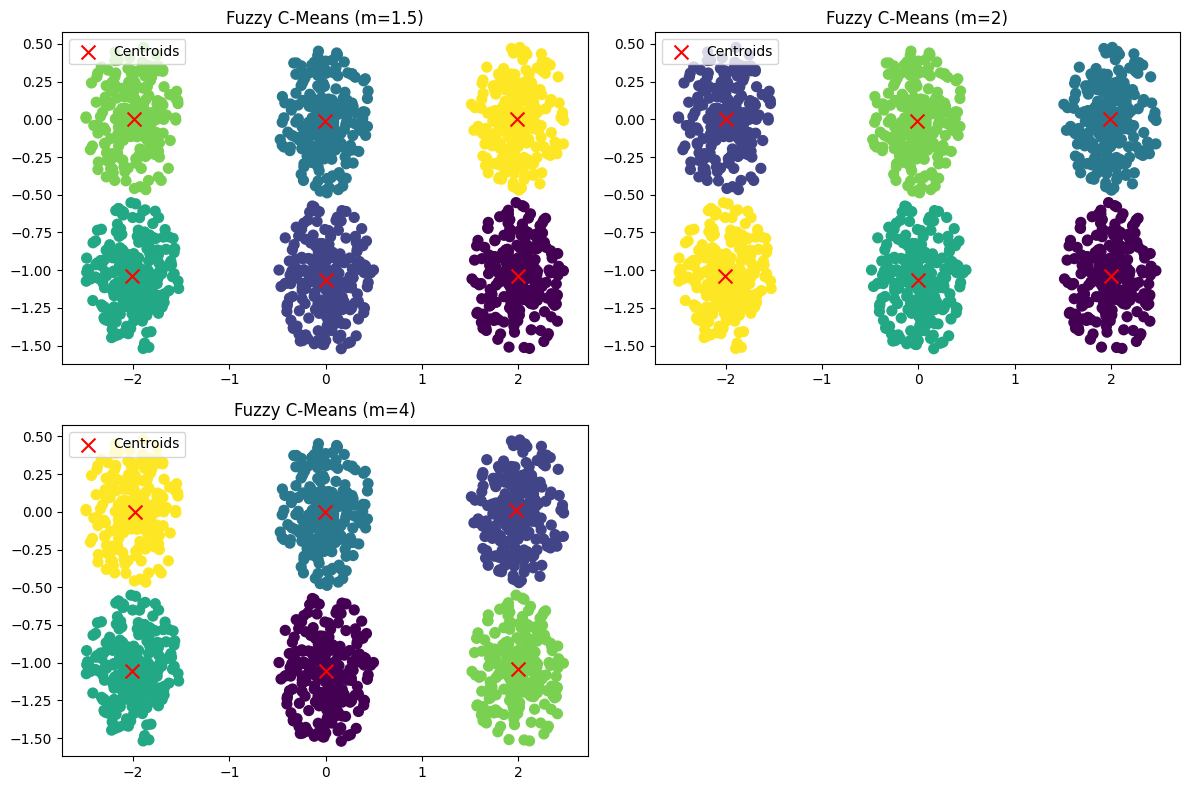

In [21]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
# Giả sử file CSV có 2 cột x và y
data = pd.read_csv(r"D:\HocTap2425\Seminar\Dataset\BCVI\AI_Datasets\D1_data.csv")  # Đường dẫn tới file CSV
X = data.values.T  # Chuyển đổi thành ma trận 2 chiều (2xN)

# Số cụm c = 2
c = 6

# Định nghĩa các giá trị m cần thử
m_values = [1.5, 2, 4]

# Vẽ đồ thị phân cụm cho các giá trị m khác nhau
plt.figure(figsize=(12, 8))

for i, m in enumerate(m_values):
    # Áp dụng Fuzzy C-Means với mỗi giá trị m
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(X, c, m, error=0.005, maxiter=1000)
    
    # Vẽ điểm dữ liệu
    plt.subplot(2, 2, i + 1)
    plt.scatter(X[0], X[1], c=np.argmax(u, axis=0), cmap='viridis', s=50)
    plt.title(f'Fuzzy C-Means (m={m})')

    # Vẽ các tâm cụm
    plt.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.legend()

plt.tight_layout()
plt.show()


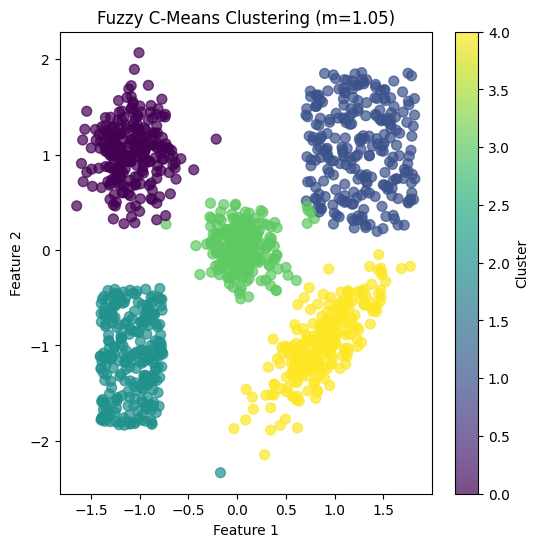

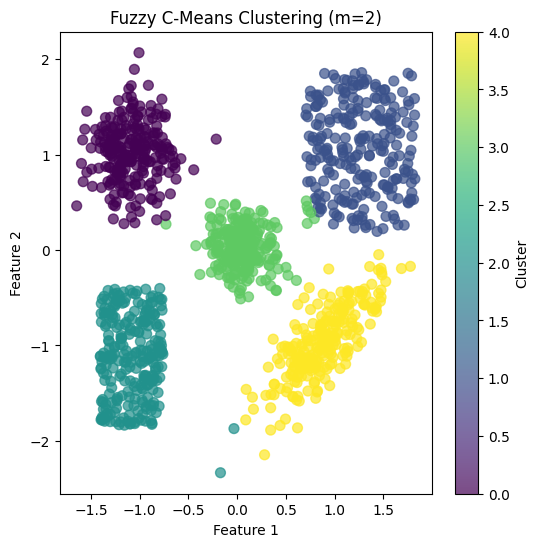

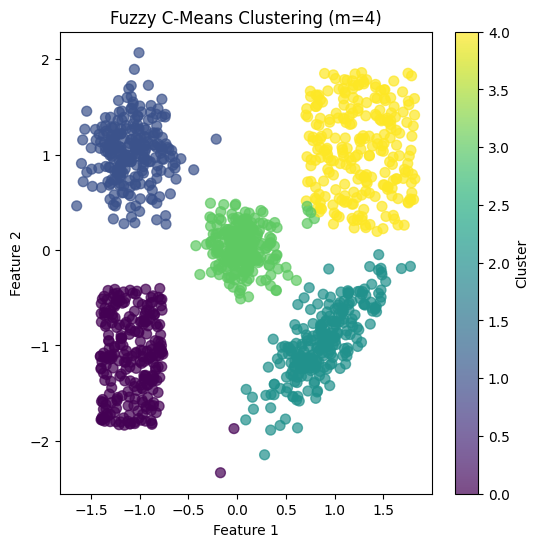

m = 1.05:
Tổng tỷ lệ các điểm trong toàn bộ cụm: 1.00


m = 2:
Tổng tỷ lệ các điểm trong toàn bộ cụm: 1.00


m = 4:
Tổng tỷ lệ các điểm trong toàn bộ cụm: 1.00




In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM  # Thư viện FCM

# Đọc file CSV
file_path = r"D:\HocTap2425\Seminar\Dataset\BCVI\AI_Datasets\D10_data.csv"  # Đảm bảo rằng đường dẫn tới file CSV của bạn đúng
data = pd.read_csv(file_path)

# Giả sử dữ liệu là 2D, lấy 2 cột đầu tiên làm ví dụ
X = data.iloc[:, :2].values  # Chọn 2 cột đầu tiên nếu dữ liệu có nhiều hơn 2 cột

# Tiền xử lý dữ liệu (tiêu chuẩn hóa)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Số cụm cần phân chia
c = 5

# Hàm phân cụm với các giá trị m khác nhau và tính tỷ lệ các điểm trong mỗi cụm
def fuzzy_cmeans(X, m_values, c):
    results = {}
    
    for m in m_values:
        # Khởi tạo FCM với m và số cụm c
        fcm = FCM(n_clusters=c, m=m, max_iter=1000, error=1e-6, random_state=42)
        fcm.fit(X)
        
        # Lấy độ thành viên của các điểm trong các cụm
        u = fcm.u
        cluster_assignments = np.argmax(u, axis=1)  # Xác định cụm mà mỗi điểm thuộc về
        
        # Tính tỷ lệ điểm dữ liệu trong mỗi cụm
        cluster_counts = np.bincount(cluster_assignments, minlength=c)
        total_points = len(X)
        cluster_ratios = cluster_counts / total_points
        
        # Lưu kết quả
        results[m] = {
            "cluster_assignments": cluster_assignments,
            "cluster_ratios": cluster_ratios,
            "u_matrix": u
        }
        
        # Vẽ biểu đồ
        plt.figure(figsize=(6, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_assignments, cmap='viridis', s=50, alpha=0.7)
        plt.title(f'Fuzzy C-Means Clustering (m={m})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.colorbar(label='Cluster')
        plt.show()
        
    return results

# Chạy phân cụm với các giá trị m
m_values = [1.05, 2, 4]
results = fuzzy_cmeans(X_scaled, m_values, c)

# In tỷ lệ các điểm trong mỗi cụm cho mỗi giá trị m
for m, result in results.items():
    print(f"m = {m}:")
    total_ratio = 0  # Tổng tỷ lệ điểm dữ liệu trong toàn bộ các cụm
    for i, ratio in enumerate(result['cluster_ratios']):
        #print(f"  Cluster {i}: {ratio:.2f}")
        total_ratio += ratio
    print(f"Tổng tỷ lệ các điểm trong toàn bộ cụm: {total_ratio:.2f}")
    print("\n")


ValueError: 'c' argument has 6 elements, which is inconsistent with 'x' and 'y' with size 1500.

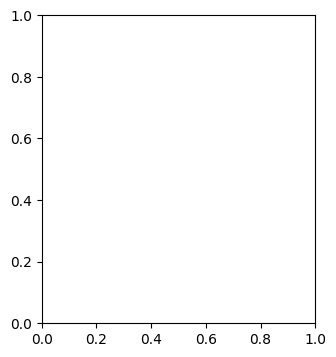

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fcmeans import FCM

# Đọc tệp CSV
data = pd.read_csv(r"D:\HocTap2425\Seminar\Dataset\BCVI\AI_Datasets\D1_data.csv")

# Giả sử dữ liệu của bạn là dạng hai chiều
X = data.values

# Số cụm
c = 6

# Các giá trị m cần thử nghiệm
m_values = [1.5, 2, 4]

# Vẽ phân cụm cho từng giá trị m
plt.figure(figsize=(12, 4))

for idx, m in enumerate(m_values):
    # Khởi tạo và huấn luyện FCM với giá trị m
    fcm = FCM(n_clusters=c, m=m)
    fcm.fit(X)
    
    # Dự đoán độ thành viên của từng điểm dữ liệu
    u = fcm.u
    
    # Vẽ đồ thị phân cụm
    plt.subplot(1, len(m_values), idx+1)
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(u, axis=0), cmap='viridis', marker='o')
    plt.title(f"Fuzzy C-Means (m={m})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Tính tỷ lệ điểm dữ liệu trong từng cụm
    cluster_sizes = np.sum(u > 0.5, axis=1)
    print(f"Cluster sizes for m={m}: {cluster_sizes}")

plt.tight_layout()
plt.show()


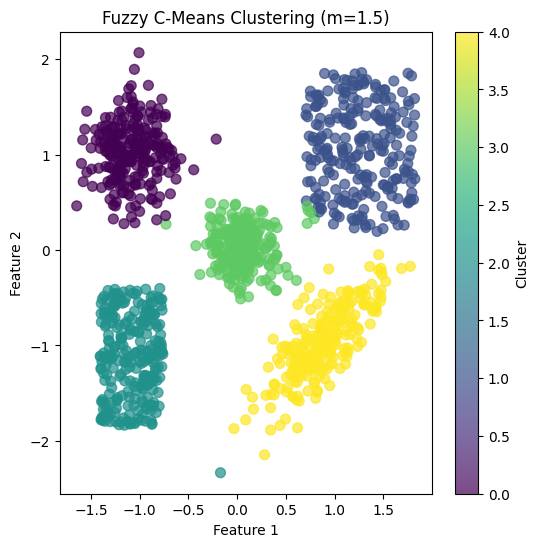

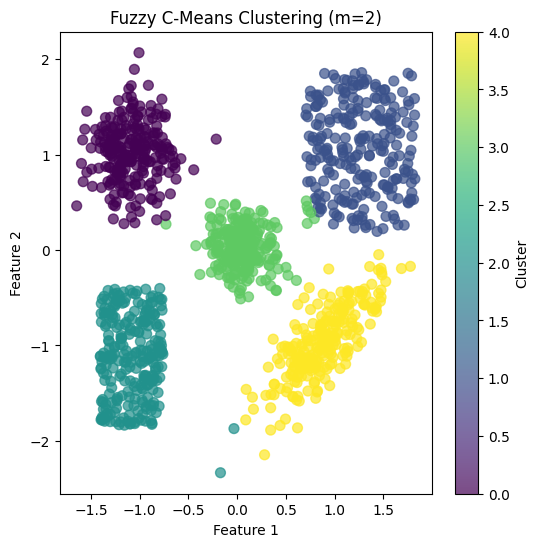

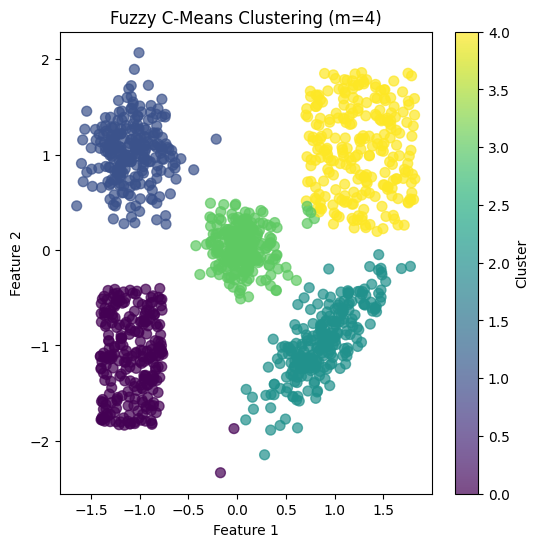

m = 1.5:
  Cluster 0: 0.20
  Cluster 1: 0.19
  Cluster 2: 0.20
  Cluster 3: 0.22
  Cluster 4: 0.19


1.0
m = 2:
  Cluster 0: 0.20
  Cluster 1: 0.17
  Cluster 2: 0.19
  Cluster 3: 0.24
  Cluster 4: 0.19


1.0
m = 4:
  Cluster 0: 0.19
  Cluster 1: 0.20
  Cluster 2: 0.20
  Cluster 3: 0.23
  Cluster 4: 0.18


1.0


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM  # Thư viện FCM

# Đọc file CSV
file_path = r"D:\HocTap2425\Seminar\Dataset\BCVI\AI_Datasets\D10_data.csv"  # Đảm bảo rằng đường dẫn tới file CSV của bạn đúng
data = pd.read_csv(file_path)

# Giả sử dữ liệu là 2D, lấy 2 cột đầu tiên làm ví dụ
X = data.iloc[:, :2].values  # Chọn 2 cột đầu tiên nếu dữ liệu có nhiều hơn 2 cột

# Tiền xử lý dữ liệu (tiêu chuẩn hóa)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Số cụm cần phân chia
c = 5

# Hàm phân cụm với các giá trị m khác nhau và tính tỷ lệ các điểm trong mỗi cụm
def fuzzy_cmeans(X, m_values, c):
    results = {}
    
    for m in m_values:
        # Khởi tạo FCM với m và số cụm c
        fcm = FCM(n_clusters=c, m=m, max_iter=1000, error=1e-6, random_state=42)
        fcm.fit(X)
        
        # Lấy độ thành viên của các điểm trong các cụm
        u = fcm.u
        cluster_assignments = np.argmax(u, axis=1)  # Xác định cụm mà mỗi điểm thuộc về
        
        # Tính tỷ lệ điểm dữ liệu trong mỗi cụm (dựa trên độ thành viên mờ)
        cluster_ratios = np.sum(u, axis=0) / len(X)  # Tính tỷ lệ điểm trong mỗi cụm

        # Lưu kết quả
        results[m] = {
            "cluster_assignments": cluster_assignments,
            "cluster_ratios": cluster_ratios,
            "u_matrix": u
        }
        
        # Vẽ biểu đồ
        plt.figure(figsize=(6, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_assignments, cmap='viridis', s=50, alpha=0.7)
        plt.title(f'Fuzzy C-Means Clustering (m={m})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.colorbar(label='Cluster')
        plt.show()
        
    return results

# Chạy phân cụm với các giá trị m
m_values = [1.5, 2, 4]
results = fuzzy_cmeans(X_scaled, m_values, c)

# In tỷ lệ các điểm trong mỗi cụm cho mỗi giá trị m
for m, result in results.items():
    print(f"m = {m}:")
    total_ratio = 0
    for i, ratio in enumerate(result['cluster_ratios']):
        print(f"  Cluster {i}: {ratio:.2f}")
        total_ratio += ratio
    print("\n")
    print(total_ratio)
